In [526]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from sklearn import metrics

In [527]:
images = []
image_classes = []

for i in range(len(classes)):
    imagePaths = glob.glob('./dataset/images/' + classes[i][0] + '/*.jpg') 
    for imgPath in imagePaths:
            img = Image.open(imgPath)
            img = img.resize((200, 200))
            img.load()
            data = np.asarray(img, dtype="int32")
            images.append(data)
            image_classes.append(i)

        

images = np.array(images)
image_classes = np.array(image_classes)

print(images.shape)
print(image_classes.shape)

(7956, 200, 200, 4)
(7956,)


In [528]:
x_train, x_test, y_train, y_test = train_test_split(images, image_classes)

In [529]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (5967, 200, 200, 4)
y_train shape: (5967,)
x_test shape: (1989, 200, 200, 4)
y_test shape: (1989,)
5967 train samples
1989 test samples


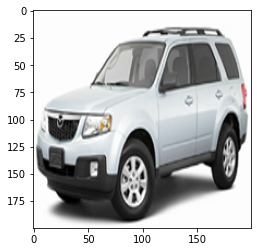

In [530]:
plt.imshow(x_train[15])

In [531]:
y_train = tf.keras.utils.to_categorical(y_train, len(classes))
y_test = tf.keras.utils.to_categorical(y_test, len(classes))

In [532]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [533]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train)
print(x_test)

[[[[0.14117648 0.21960784 0.09411765 1.        ]
   [0.1882353  0.25490198 0.16862746 1.        ]
   [0.2        0.27058825 0.16470589 1.        ]
   ...
   [0.11764706 0.19607843 0.20784314 1.        ]
   [0.12941177 0.2        0.22745098 1.        ]
   [0.23921569 0.2901961  0.32941177 1.        ]]

  [[0.10980392 0.19215687 0.05490196 1.        ]
   [0.21568628 0.28627452 0.18431373 1.        ]
   [0.23529412 0.30980393 0.18431373 1.        ]
   ...
   [0.28627452 0.38039216 0.39607844 1.        ]
   [0.36078432 0.4392157  0.4745098  1.        ]
   [0.33333334 0.39215687 0.4392157  1.        ]]

  [[0.10588235 0.1882353  0.04313726 1.        ]
   [0.1764706  0.25490198 0.13725491 1.        ]
   [0.21568628 0.29411766 0.14509805 1.        ]
   ...
   [0.49803922 0.6        0.627451   1.        ]
   [0.54901963 0.63529414 0.6745098  1.        ]
   [0.3529412  0.42352942 0.47058824 1.        ]]

  ...

  [[0.48235294 0.44313726 0.38431373 1.        ]
   [0.59607846 0.56078434 0.4941176

In [534]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 4)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(len(classes), activation='softmax'))

In [535]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 200, 200, 32)      1184      
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 50, 50, 128)     

In [ ]:
opt = SGD(learning_rate=0.001, momentum=0.9)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=opt)

model.fit(x_train, y_train, epochs=100, verbose=1 ,callbacks=[monitor], validation_data=(x_test, y_test))

Train on 5967 samples, validate on 1989 samples
Epoch 1/100
3328/5967 [===============>..............] - ETA: 10:27 - loss: 5.2929

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test ,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Precision: {}'.format(score))

r1 = metrics.recall_score(y_true, pred, average='weighted')
print('Recall : {}'.format(r1))

f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

print(metrics.classification_report(y_true, pred))

In [ ]:
fig = plt.figure(figsize=(20, 20))

rows = 5

images = x_test[0:rows];

for i in range(len(images)):
  fig.add_subplot(rows, 1, i+1)

  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title("True Labels: {} \n Predicted Labels: {}".format(classes[y_true[i]], classes[pred[i]]))